# __Rick and Morty__

## Introduction

> RM fandom is a movie analytics non-profit that analyzes movie data to create visualizations, answer key questions
and find interesting patterns in data.

## Aim

> Perform analysis on data from the Rick and Morty API to determine how different features are related to the number
of episodes a character appears in.

In [1]:
# Import required packages

import requests
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np

In [2]:
# Get the data from the RM API endpoint

data = []
url = 'https://rickandmortyapi.com/api/character' # API url endpoint
while url is not None:
    r = requests.get(
            url
        ).json()
    url = r['info']['next']
    data.extend(r['results'])

In [3]:
len(data) # Length of the data

826

In [4]:
# convert the data into a pandas dataframe

df = pd.DataFrame(data)
df.head()

,id,name,status,species,type,gender,origin,location,image,episode,url,created
0,1,Rick Sanchez,Alive,Human,,Male,"{'name': 'Earth (C-137)', 'url': 'https://rick...","{'name': 'Citadel of Ricks', 'url': 'https://r...",https://rickandmortyapi.com/api/character/avat...,"[https://rickandmortyapi.com/api/episode/1, ht...",https://rickandmortyapi.com/api/character/1,2017-11-04T18:48:46.250Z
1,2,Morty Smith,Alive,Human,,Male,"{'name': 'unknown', 'url': ''}","{'name': 'Citadel of Ricks', 'url': 'https://r...",https://rickandmortyapi.com/api/character/avat...,"[https://rickandmortyapi.com/api/episode/1, ht...",https://rickandmortyapi.com/api/character/2,2017-11-04T18:50:21.651Z
2,3,Summer Smith,Alive,Human,,Female,"{'name': 'Earth (Replacement Dimension)', 'url...","{'name': 'Earth (Replacement Dimension)', 'url...",https://rickandmortyapi.com/api/character/avat...,"[https://rickandmortyapi.com/api/episode/6, ht...",https://rickandmortyapi.com/api/character/3,2017-11-04T19:09:56.428Z
3,4,Beth Smith,Alive,Human,,Female,"{'name': 'Earth (Replacement Dimension)', 'url...","{'name': 'Earth (Replacement Dimension)', 'url...",https://rickandmortyapi.com/api/character/avat...,"[https://rickandmortyapi.com/api/episode/6, ht...",https://rickandmortyapi.com/api/character/4,2017-11-04T19:22:43.665Z
4,5,Jerry Smith,Alive,Human,,Male,"{'name': 'Earth (Replacement Dimension)', 'url...","{'name': 'Earth (Replacement Dimension)', 'url...",https://rickandmortyapi.com/api/character/avat...,"[https://rickandmortyapi.com/api/episode/6, ht...",https://rickandmortyapi.com/api/character/5,2017-11-04T19:26:56.301Z


In [5]:
# replace the content of the origin and location column with the name only.

df['origin'] = df['origin'].apply(pd.Series)['name']
df['location'] = df['location'].apply(pd.Series)['name']

In [6]:
# create a new column with the number of episodes

df['number_of_episodes'] = df['episode'].apply(len)

In [7]:
# convert the created column to a datetime data type

df['created'] = pd.to_datetime(df['created'])

In [8]:
df.head(10)

,id,name,status,species,type,gender,origin,location,image,episode,url,created,number_of_episodes
0,1,Rick Sanchez,Alive,Human,,Male,Earth (C-137),Citadel of Ricks,https://rickandmortyapi.com/api/character/avat...,"[https://rickandmortyapi.com/api/episode/1, ht...",https://rickandmortyapi.com/api/character/1,2017-11-04 18:48:46.250000+00:00,51
1,2,Morty Smith,Alive,Human,,Male,unknown,Citadel of Ricks,https://rickandmortyapi.com/api/character/avat...,"[https://rickandmortyapi.com/api/episode/1, ht...",https://rickandmortyapi.com/api/character/2,2017-11-04 18:50:21.651000+00:00,51
2,3,Summer Smith,Alive,Human,,Female,Earth (Replacement Dimension),Earth (Replacement Dimension),https://rickandmortyapi.com/api/character/avat...,"[https://rickandmortyapi.com/api/episode/6, ht...",https://rickandmortyapi.com/api/character/3,2017-11-04 19:09:56.428000+00:00,42
3,4,Beth Smith,Alive,Human,,Female,Earth (Replacement Dimension),Earth (Replacement Dimension),https://rickandmortyapi.com/api/character/avat...,"[https://rickandmortyapi.com/api/episode/6, ht...",https://rickandmortyapi.com/api/character/4,2017-11-04 19:22:43.665000+00:00,42
4,5,Jerry Smith,Alive,Human,,Male,Earth (Replacement Dimension),Earth (Replacement Dimension),https://rickandmortyapi.com/api/character/avat...,"[https://rickandmortyapi.com/api/episode/6, ht...",https://rickandmortyapi.com/api/character/5,2017-11-04 19:26:56.301000+00:00,39
5,6,Abadango Cluster Princess,Alive,Alien,,Female,Abadango,Abadango,https://rickandmortyapi.com/api/character/avat...,[https://rickandmortyapi.com/api/episode/27],https://rickandmortyapi.com/api/character/6,2017-11-04 19:50:28.250000+00:00,1
6,7,Abradolf Lincler,unknown,Human,Genetic experiment,Male,Earth (Replacement Dimension),Testicle Monster Dimension,https://rickandmortyapi.com/api/character/avat...,"[https://rickandmortyapi.com/api/episode/10, h...",https://rickandmortyapi.com/api/character/7,2017-11-04 19:59:20.523000+00:00,2
7,8,Adjudicator Rick,Dead,Human,,Male,unknown,Citadel of Ricks,https://rickandmortyapi.com/api/character/avat...,[https://rickandmortyapi.com/api/episode/28],https://rickandmortyapi.com/api/character/8,2017-11-04 20:03:34.737000+00:00,1
8,9,Agency Director,Dead,Human,,Male,Earth (Replacement Dimension),Earth (Replacement Dimension),https://rickandmortyapi.com/api/character/avat...,[https://rickandmortyapi.com/api/episode/24],https://rickandmortyapi.com/api/character/9,2017-11-04 20:06:54.976000+00:00,1
9,10,Alan Rails,Dead,Human,Superhuman (Ghost trains summoner),Male,unknown,Worldender's lair,https://rickandmortyapi.com/api/character/avat...,[https://rickandmortyapi.com/api/episode/25],https://rickandmortyapi.com/api/character/10,2017-11-04 20:19:09.017000+00:00,1


In [9]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 826 entries, 0 to 825
Data columns (total 13 columns):
 #   Column              Non-Null Count  Dtype              
---  ------              --------------  -----              
 0   id                  826 non-null    int64              
 1   name                826 non-null    object             
 2   status              826 non-null    object             
 3   species             826 non-null    object             
 4   type                826 non-null    object             
 5   gender              826 non-null    object             
 6   origin              826 non-null    object             
 7   location            826 non-null    object             
 8   image               826 non-null    object             
 9   episode             826 non-null    object             
 10  url                 826 non-null    object             
 11  created             826 non-null    datetime64[ns, UTC]
 12  number_of_episodes  826 non-null    

In [10]:
df.isna().sum() # check for null values

id                    0
name                  0
status                0
species               0
type                  0
gender                0
origin                0
location              0
image                 0
episode               0
url                   0
created               0
number_of_episodes    0
dtype: int64

In [11]:
#set the base colour to use for charts and visualizations

colour = sns.color_palette()[0]
group_colour = [
    (0.12156862745098039, 0.4666666666666667, 0.7058823529411765), 
    (1.0, 0.4980392156862745, 0.054901960784313725)
]

In [12]:
def bar_chart(data=None, y=None, x=None, hue=None, title=None, xlabel=None, ylabel=None, colour=colour):
    '''
    This is a functin that plots a bar chart given the appropriate data and customize it. 
    It takes a y and x values as compulsory values
    '''
    
    plt.figure(figsize=(15,6)); # Set the size of the chart. 
    sns.barplot(
        data=data,
        y=y,
        x=x, 
        hue=hue,
        errwidth=0,
        color=colour,
#         palette=colour
    )
    sns.despine()
    plt.xlabel(xlabel.title(), fontdict={'fontsize': 14, 'fontfamily': 'comic sans ms'})
    plt.ylabel(ylabel.title(), fontdict={'fontsize': 14, 'fontfamily': 'comic sans ms'})
    plt.title(title.title(), fontdict={'fontsize': 20, 'fontfamily': 'comic sans ms'})
    plt.tight_layout()

In [13]:
def count_chart(data=None, y=None, x=None, hue=None, title=None, xlabel=None, ylabel=None, colour=colour, **kwargs):
    '''
    This is a functin that plots a bar chart given the appropriate data and customize it. 
    It takes a y and x values as compulsory values
    '''
    
    plt.figure(figsize=(15,6)); # Set the size of the chart. 
    sns.countplot(
        data=data,
        y=y,
        x=x, 
        hue=hue,
        color=colour,
        **kwargs
#         palette=colour
    )
    sns.despine()
    plt.xlabel(xlabel.title(), fontdict={'fontsize': 14, 'fontfamily': 'comic sans ms'})
    plt.ylabel(ylabel.title(), fontdict={'fontsize': 14, 'fontfamily': 'comic sans ms'})
    plt.title(title.title(), fontdict={'fontsize': 20, 'fontfamily': 'comic sans ms'})
    plt.legend(loc='upper right')
    plt.tight_layout()

In [14]:
def stacked_bar_chart(data=None, y=None, x=None, hue=None, title=None, xlabel=None, ylabel=None, colour=colour):
    '''
    This is a functin that plots a stacked bar chart given the appropriate data and customize it. 
    It takes a y and x values as compulsory values
    '''
    
    plt.figure(figsize=(15,6)); # Set the size of the chart. 
    data.plot(
        kind='stacked',
        y=y,
        x=x, 
        hue=hue,
        errwidth=0,
        color=colour,
        palette=colour
    )
    sns.despine()
    plt.xlabel(xlabel.title(), fontdict={'fontsize': 14, 'fontfamily': 'comic sans ms'})
    plt.ylabel(ylabel.title(), fontdict={'fontsize': 14, 'fontfamily': 'comic sans ms'})
    plt.title(title.title(), fontdict={'fontsize': 20, 'fontfamily': 'comic sans ms'})
    plt.tight_layout()

In [15]:
def line_chart(data=None, y=None, x=None, hue=None, title=None, xlabel=None, ylabel=None):
    '''
    This is a functin that plots a line chart given the appropriate data and customize it. 
    It takes a y and x values as compulsory values
    '''
     
    data.plot( 
        x=x, 
        y=y, 
        figsize=(15, 6),
    );
    sns.despine();
    plt.xlabel(xlabel.title(), fontdict={'fontsize': 14, 'fontfamily': 'comic sans ms'});
    plt.ylabel(ylabel.title(), fontdict={'fontsize': 14, 'fontfamily': 'comic sans ms'});
    plt.title(title.title(), fontdict={'fontsize': 20, 'fontfamily': 'comic sans ms'});
    plt.tight_layout();

In [16]:
def pie_chart(data, labels=None, title=None, explode=None, startangle=None):
    plt.figure(figsize = (15,6));
    plt.pie(
        data, 
        labels=labels, 
        autopct= '%.2f%%', 
        startangle=startangle, 
        explode=explode, 
        textprops={
            'fontsize': 14,
            'fontfamily': 'comic sans ms'
        },
        radius=1.2,
        wedgeprops = {'linewidth': 5},
        
    );
    plt.title(title.title(), fontdict={
        'fontsize': 20,
        'fontfamily': 'comic sans ms'
    })

In [17]:
def donut(data, label=None, title=None, start_angle=None):
    pie_chart(data, labels=label, title=title, startangle=start_angle)
    c = plt.Circle((0,0), 0.4, color='white')
    p=plt.gcf()
    p.gca().add_artist(c)


In [18]:
def histogram(data, title=None, xlabel=None, ylabel=None, **kwargs):
    plt.figure(figsize=(15, 6))
    sns.histplot(
        data,
        **kwargs
    )
    sns.despine()
    plt.xlabel(xlabel.title(), fontdict={'fontsize': 14, 'fontfamily': 'comic sans ms'})
    plt.ylabel(ylabel.title(), fontdict={'fontsize': 14, 'fontfamily': 'comic sans ms'})
    plt.title(title.title(), fontdict={'fontsize': 20, 'fontfamily': 'comic sans ms'})
    plt.tight_layout()

In [19]:
df.gender.value_counts().index

Index(['Male', 'Female', 'unknown', 'Genderless'], dtype='object')

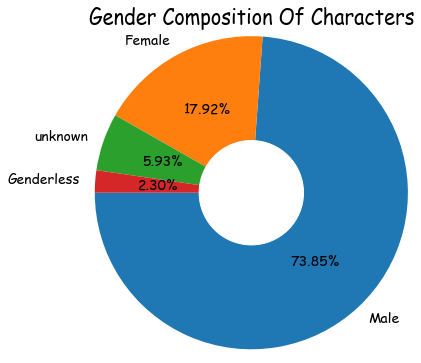

In [20]:
donut(
    data = df.gender.value_counts().values,
    title = 'Gender composition of characters',
    label = ['Male', 'Female', 'unknown', 'Genderless'],
    start_angle=-180
)

> As seen from the chart above, there are more `Male` characters than anyother gender accounting for over `73%` of the total characters. `Female` characters come a distanct second with about `18%` while `Unknown` and `genderless` round up the ranking.

In [21]:
df.head()

,id,name,status,species,type,gender,origin,location,image,episode,url,created,number_of_episodes
0,1,Rick Sanchez,Alive,Human,,Male,Earth (C-137),Citadel of Ricks,https://rickandmortyapi.com/api/character/avat...,"[https://rickandmortyapi.com/api/episode/1, ht...",https://rickandmortyapi.com/api/character/1,2017-11-04 18:48:46.250000+00:00,51
1,2,Morty Smith,Alive,Human,,Male,unknown,Citadel of Ricks,https://rickandmortyapi.com/api/character/avat...,"[https://rickandmortyapi.com/api/episode/1, ht...",https://rickandmortyapi.com/api/character/2,2017-11-04 18:50:21.651000+00:00,51
2,3,Summer Smith,Alive,Human,,Female,Earth (Replacement Dimension),Earth (Replacement Dimension),https://rickandmortyapi.com/api/character/avat...,"[https://rickandmortyapi.com/api/episode/6, ht...",https://rickandmortyapi.com/api/character/3,2017-11-04 19:09:56.428000+00:00,42
3,4,Beth Smith,Alive,Human,,Female,Earth (Replacement Dimension),Earth (Replacement Dimension),https://rickandmortyapi.com/api/character/avat...,"[https://rickandmortyapi.com/api/episode/6, ht...",https://rickandmortyapi.com/api/character/4,2017-11-04 19:22:43.665000+00:00,42
4,5,Jerry Smith,Alive,Human,,Male,Earth (Replacement Dimension),Earth (Replacement Dimension),https://rickandmortyapi.com/api/character/avat...,"[https://rickandmortyapi.com/api/episode/6, ht...",https://rickandmortyapi.com/api/character/5,2017-11-04 19:26:56.301000+00:00,39


In [22]:
top_locations = df.location.value_counts()[:10]

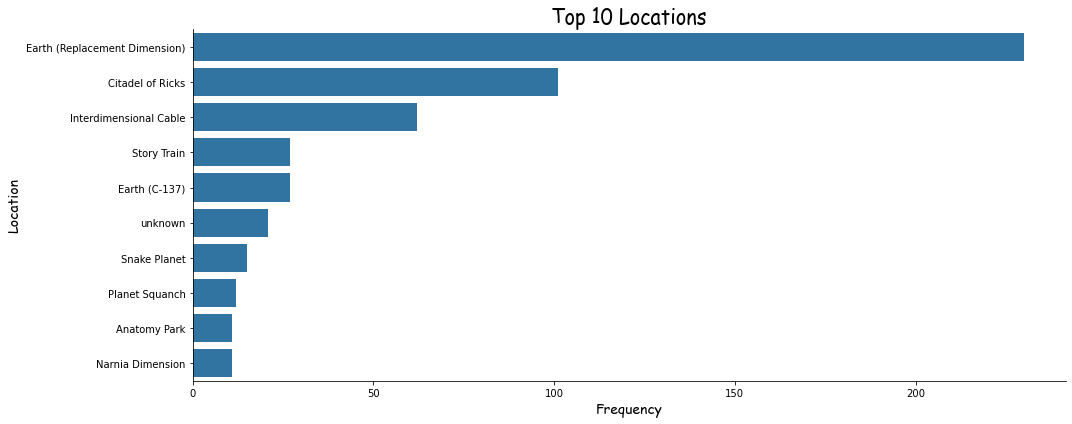

In [23]:
bar_chart(
    x = top_locations.values,
    y= top_locations.index,
    title='top 10 locations',
    xlabel='Frequency',
    ylabel='location'
)

`Earth (replacement Dimension)` is the most popular location with a frequency of `230` with `Citadel of Ricks` and `Interdimensional Cable` wrapping up the top three with `101` and `62` respectively.

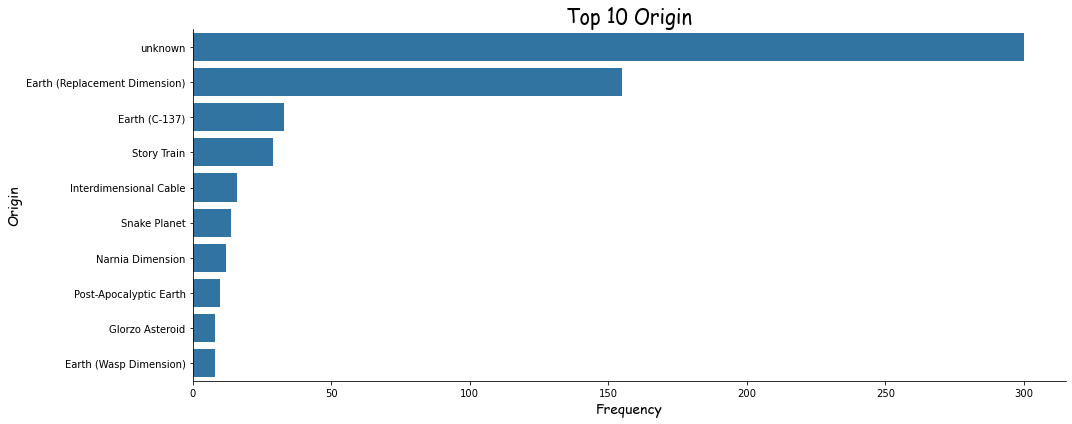

In [24]:
top_origin = df.origin.value_counts()[:10]

bar_chart(
    x = top_origin.values,
    y= top_origin.index,
    title='top 10 origin',
    xlabel='Frequency',
    ylabel='origin'
)

> Majority of characters `(300)` are seen to have an `Unknown` origin which is almost twice the number for second place `Earth (Replacement Dimension)` with `155` and `Earth (C-137)` coming at a distanct third with `33`.

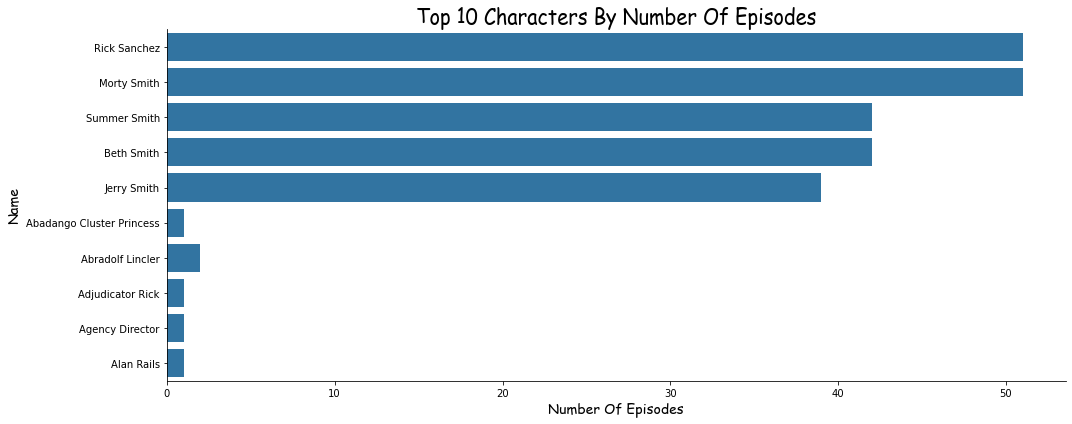

In [25]:
bar_chart(
    data = df.head(10),
    y = 'name',
    x= 'number_of_episodes',
    title='top 10 characters by number of episodes',
    xlabel='Number of episodes',
    ylabel='name'
)

In [26]:
df.head()

,id,name,status,species,type,gender,origin,location,image,episode,url,created,number_of_episodes
0,1,Rick Sanchez,Alive,Human,,Male,Earth (C-137),Citadel of Ricks,https://rickandmortyapi.com/api/character/avat...,"[https://rickandmortyapi.com/api/episode/1, ht...",https://rickandmortyapi.com/api/character/1,2017-11-04 18:48:46.250000+00:00,51
1,2,Morty Smith,Alive,Human,,Male,unknown,Citadel of Ricks,https://rickandmortyapi.com/api/character/avat...,"[https://rickandmortyapi.com/api/episode/1, ht...",https://rickandmortyapi.com/api/character/2,2017-11-04 18:50:21.651000+00:00,51
2,3,Summer Smith,Alive,Human,,Female,Earth (Replacement Dimension),Earth (Replacement Dimension),https://rickandmortyapi.com/api/character/avat...,"[https://rickandmortyapi.com/api/episode/6, ht...",https://rickandmortyapi.com/api/character/3,2017-11-04 19:09:56.428000+00:00,42
3,4,Beth Smith,Alive,Human,,Female,Earth (Replacement Dimension),Earth (Replacement Dimension),https://rickandmortyapi.com/api/character/avat...,"[https://rickandmortyapi.com/api/episode/6, ht...",https://rickandmortyapi.com/api/character/4,2017-11-04 19:22:43.665000+00:00,42
4,5,Jerry Smith,Alive,Human,,Male,Earth (Replacement Dimension),Earth (Replacement Dimension),https://rickandmortyapi.com/api/character/avat...,"[https://rickandmortyapi.com/api/episode/6, ht...",https://rickandmortyapi.com/api/character/5,2017-11-04 19:26:56.301000+00:00,39


> `Rick Sanchez` and `Morty Smith` are the shows most popular with `51 episodes` each. `Summer Smith` and `Beth Smith` rounds the top four with `42 episodes` each.

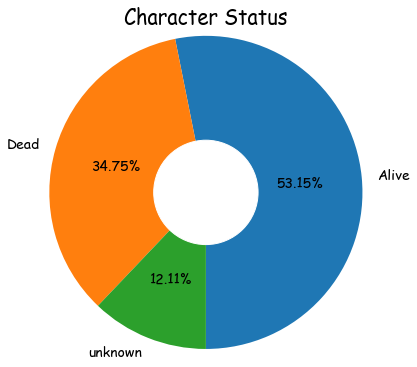

In [27]:
donut(
    data=df.status.value_counts().values,
    label=df.status.value_counts().index,
    title='Character status',
    start_angle=-90
)

> As seen from the chart above, `53%` of the characters are `alive` with another `34%` `dead` and `12%` have an `unknown` status.

No handles with labels found to put in legend.


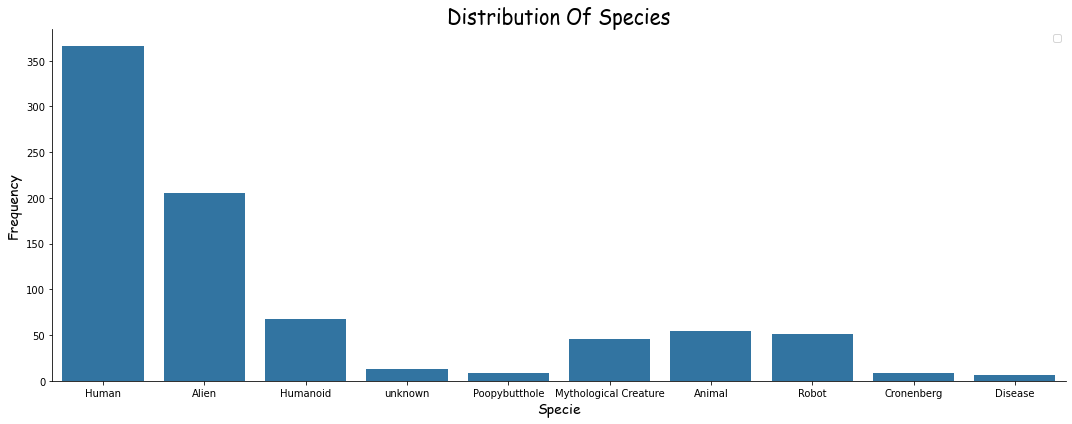

In [28]:
count_chart(
    data=df,
    x='species',
    title='distribution of species',
    xlabel='specie',
    ylabel='frequency',
)

> The chart above shows that the `Human` specie is the most comon appearing over 366 times. This is followed by the `Alien` and `Humanoid` with about 205 and 68 respectively.

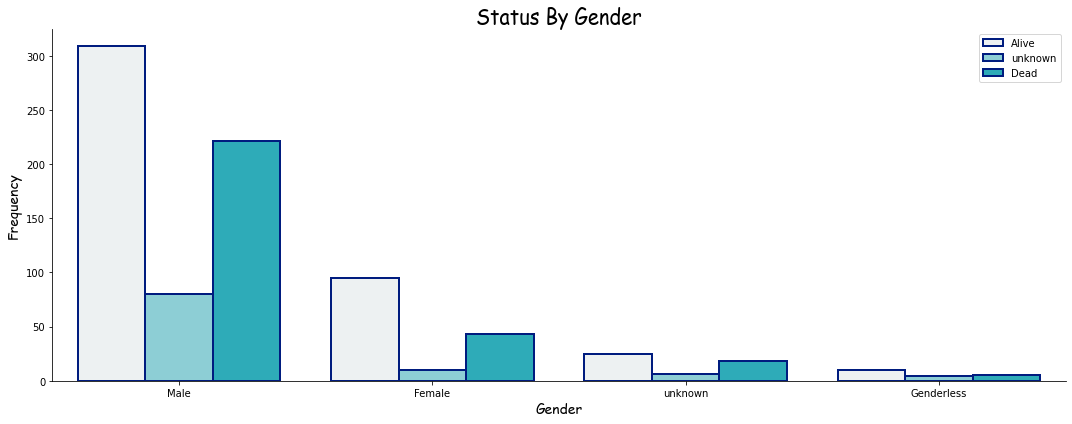

In [29]:
count_chart(
    data=df,
    x='gender',
    hue='status',
    title='status by gender',
    xlabel='Gender',
    ylabel='Frequency',
    colour=sns.color_palette()[9],
    linewidth=2,
    edgecolor=sns.color_palette("dark", 1)
)

> Looking at the chart above, there are more characyers alive thn dead or unknown. This figure is higher for male characters than any other gender while Dead male characters are also more than that recorded for any other gender. 

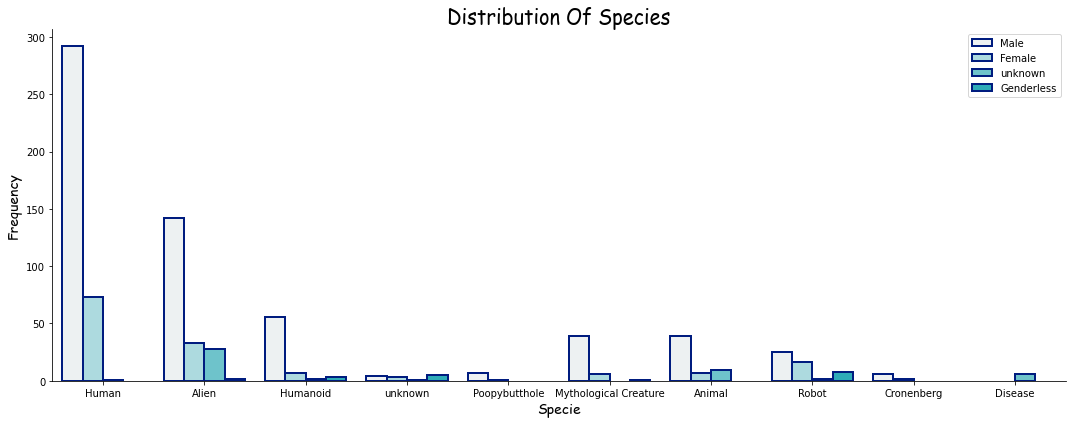

In [30]:
count_chart(
    data=df,
    x='species',
    hue='gender',
    title='distribution of species',
    xlabel='specie',
    ylabel='frequency',
    colour=sns.color_palette()[9],
    linewidth=2,
    edgecolor=sns.color_palette("dark", 1),
    
)

> Male umans are the highest group noted in the data.  This is followed by Male Alien and Female Human. 

In [31]:
gender_avg = df.groupby('gender').mean().reset_index()

In [32]:
gender_avg

,gender,id,number_of_episodes
0,Female,442.493243,1.966216
1,Genderless,526.947368,1.157895
2,Male,413.355738,1.445902
3,unknown,283.734694,1.469388


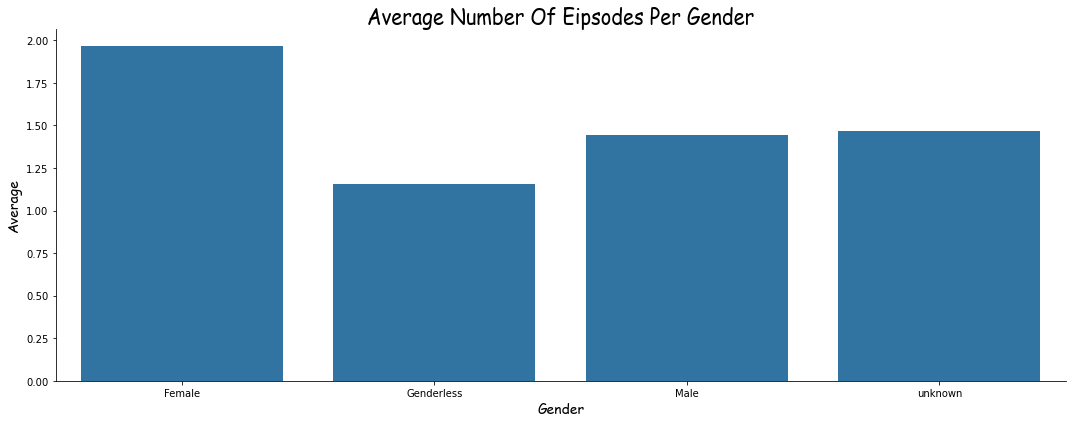

In [33]:
bar_chart(
    data=gender_avg,
    x='gender',
    y='number_of_episodes',
    title='average number of eipsodes per gender',
    xlabel='gender',
    ylabel='Average'
)

> As noted in the chart above, Female characters have a higher number of episodes than any other gender. This is in contrast to the Genderless character who record the lowest number of episodes on average.

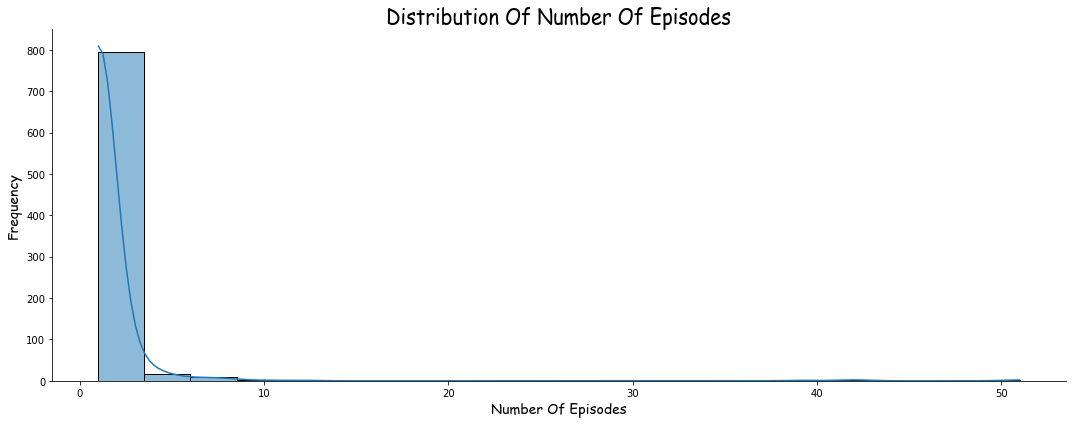

In [34]:
histogram(
    data=df.number_of_episodes,
    title='distribution of number of episodes',
    xlabel='Number of episodes',
    ylabel='Frequency',
    bins=20,
    kde=True
)

> As noticed from the histogram above, the  distribution of number of episodes appears to have a long tail and is highly skewed to the left. This implies that more characters appear in fewer episodes than those appearing in more episodes.

In [35]:
sp_avg = df.groupby('species').mean().reset_index()

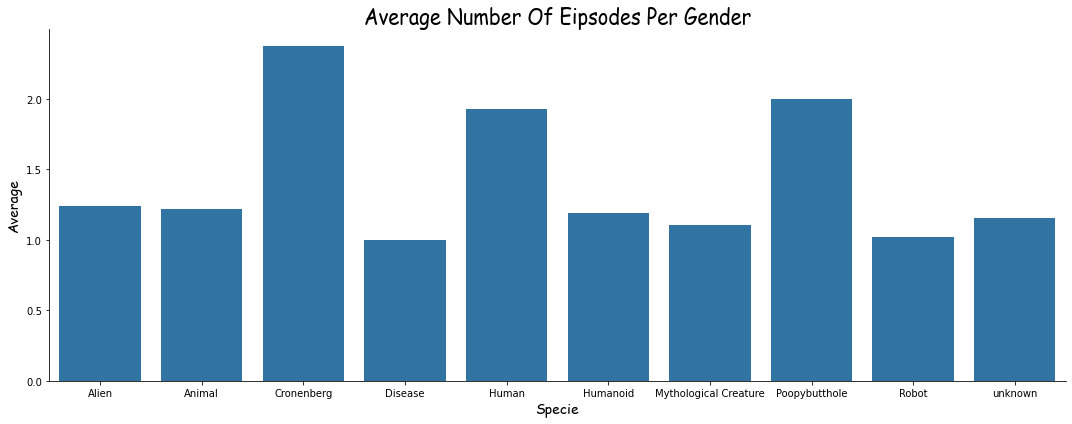

In [36]:
bar_chart(
    data=sp_avg,
    x='species',
    y='number_of_episodes',
    title='average number of eipsodes per gender',
    xlabel='Specie',
    ylabel='Average'
)

> On average it is noted that `Cronenberg` appear in more  episodes than any other specie with an average of 2.4. This is followed by `Poopybutthole` with an average of 2 episodes.

In [37]:
import wordcloud

In [38]:
episodes = df.number_of_episodes.values
name = df.name.values

In [39]:
freq = pd.Series(episodes, index=name)

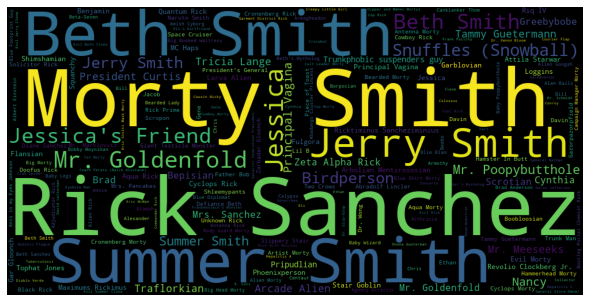

In [40]:
wc = wordcloud.WordCloud(height=500, width=1000).generate_from_frequencies(freq)

figure = plt.figure(figsize=(8,8), facecolor=None)
plt.imshow(wc)
plt.axis('off')
plt.tight_layout(pad=0)

While Rick Sanches and Morty Smith are the two most famous characters appearing in 51 episodes each. Generally speaking, the Smith Family appears to be the most famous as seen from the wordcloud above

## Conclusion

After careful study of the data presented, the following conclusions have been made
1. Rick Sanchez and Morty Smith are the two most popular character by number of epiosodes present.
2. The show has more Human characters than anyother specie.
3. Female characters appear on more episodes on average.
4. Male characters account for more characters than all other gender combined.
5. Human male charcters have featured in more episodes than any other group.

In [41]:
!jupyter nbconvert RickAndMorty.ipynb --to slides --post serve --no-input --no-prompt

[NbConvertApp] Converting notebook RickAndMorty.ipynb to slides
[NbConvertApp] Writing 1288280 bytes to RickAndMorty.slides.html
[NbConvertApp] Redirecting reveal.js requests to https://cdnjs.cloudflare.com/ajax/libs/reveal.js/3.5.0
Traceback (most recent call last):
  File "C:\Users\SHANDING\anaconda3\Scripts\jupyter-nbconvert-script.py", line 10, in <module>
    sys.exit(main())
  File "C:\Users\SHANDING\anaconda3\lib\site-packages\jupyter_core\application.py", line 264, in launch_instance
    return super(JupyterApp, cls).launch_instance(argv=argv, **kwargs)
  File "C:\Users\SHANDING\anaconda3\lib\site-packages\traitlets\config\application.py", line 846, in launch_instance
    app.start()
  File "C:\Users\SHANDING\anaconda3\lib\site-packages\nbconvert\nbconvertapp.py", line 346, in start
    self.convert_notebooks()
  File "C:\Users\SHANDING\anaconda3\lib\site-packages\nbconvert\nbconvertapp.py", line 518, in convert_notebooks
    self.convert_single_notebook(notebook_filename)
  Fi